In [1]:
import numpy as np
import matplotlib.pyplot as plt 
N = 100
pi = np.pi 
dt = 0.01
step_size = 10000
phases_minus_mean = [] 
std = 0 
natural_freq_arr = [W for W in range(10,150,10)]
Krc_arr = [] 

In [2]:
def calculate_phases(Kr, w, curr_phase,step_size, dt): 
    j = 0
    for t in range (0,step_size):    
        phase_mean = np.mean(curr_phase)  
        for i in range (0,len(curr_phase)): 
            curr_phase[i] += w + dt * Kr * np.sin(phase_mean-curr_phase[i]) 
    phases_minus_mean = curr_phase - np.mean(curr_phase) 
    while j < len(curr_phase): 
        if phases_minus_mean[j] > pi or phases_minus_mean[j] < -pi: 
            curr_phase = np.delete(curr_phase,j,None)
            phases_minus_mean = np.delete(phases_minus_mean,j,None)
        j+=1 
    return curr_phase 

In [3]:
def determine_synchronize(Kr,w,curr_phase,step_size, dt): 
    synchro = False 
    curr_phase = calculate_phases(Kr, w, curr_phase, step_size, dt) 
    std = np.std(curr_phase) 
    if std < 10**-3: 
        synchro = True 
        print("The fireflies eventually synchronize with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
    else: 
        print("The fireflies are not synchronized with Kr value "+str(Kr)+" and natural frequency " +str(w)+".") 
    return synchro 

In [4]:
def trial_synchro(w): 
    b=0.08
    while b < 1.0: 
        curr_phase = np.random.uniform(-pi,pi,N) 
        synchro = determine_synchronize(b,w, curr_phase ,step_size, dt)
        if synchro == True: 
            print("The critical value for Kr is approximately: "+str(b)+".")
            break 
        b+=0.001
    return b

In [5]:
for W in natural_freq_arr:  
    Krc =  trial_synchro(W) 
    Krc_arr.append(Krc)

The fireflies are not synchronized with Kr value 0.08 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.081 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.082 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.083 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.084 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.085 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.08600000000000001 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.08700000000000001 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.08800000000000001 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.08900000000000001 and natural frequency 10.
The fireflies are not synchronized with Kr value 0.09000000000000001 and natural frequency 10.
The fireflies eventually synchronize wit

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]


Text(0, 0.5, 'Critical Value for Kr')

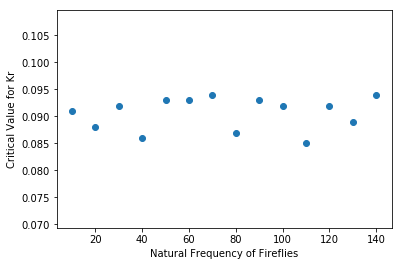

In [6]:
print(natural_freq_arr)
plt.scatter(natural_freq_arr, Krc_arr) 
plt.xlabel('Natural Frequency of Fireflies')
plt.ylabel('Critical Value for Kr') 

In [7]:
print(np.mean(Krc_arr))

0.09064285714285715
